In [13]:
import numpy as np
import rebound as rb
import matplotlib.pyplot as plt

In [14]:
# start a simulation and set the units
sim = rb.Simulation()
sim.units = ('yr','AU','Msun')
G = sim.G # REBOUND nicely gives you G in your units if you ask

In [15]:
print(G)

39.476926421373


## part (c)

In [16]:

# set up the masses

# central mass = 1 Msun
Mcent = 1.0 
sim.add(m=Mcent)

# place the test particle on the x-axis at a distance from the central mass of 1 AU
# Set vy = vcirc = (GM/r)^(1/2)
r = 1.0 # AU
vcirc = np.sqrt(G*Mcent/r)
sim.add(x=r,y=0,z=0,vx=0,vy=vcirc,vz=0)

In [17]:
# set up time stepping for the integration
totaltime = 2.0 # years
timestep = 0.01 # years
ntimes = int(totaltime/timestep + 1) # add 1 to include time 0
times = np.linspace(0,totaltime,ntimes)

In [18]:
# make arrays to hold the outputs
x = np.zeros(ntimes)
y = np.zeros(ntimes)
vx = np.zeros(ntimes)
vy = np.zeros(ntimes)

In [19]:
# integrate

for j, time in enumerate(times):
    sim.integrate(time)
    # the central mass is particle 0 and the test particle is particle 1
    x[j] = sim.particles[1].x
    y[j] = sim.particles[1].y
    vx[j] = sim.particles[1].vx
    vy[j] = sim.particles[1].vy

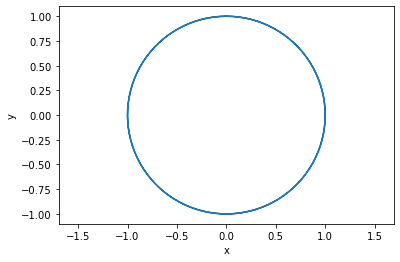

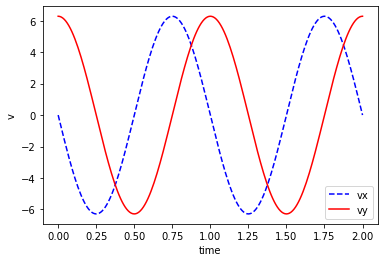

In [20]:
# plot

plt.plot(x,y)
plt.axis('equal')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

plt.plot(times, vx, 'b--', label='vx')
plt.plot(times, vy, 'r-', label='vy')
plt.legend()
plt.xlabel('time')
plt.ylabel('v')
plt.show()

#### I think we're plotting the positions and velocities of our test particle because we'll use them later as initial conditions in our integrator. We just need to make sure that the (pos,vel) for our unperturbed test particle checks out first before it will begin to be affected by the mass of our central point mass.

#### it looks good because the test particle has a perfectly circular orbit (as we see from the top-down view) and the period is 1yr if you look at where the red line for the velocity stars and finishes and starts again (from 0 to 1 and from 1 to 2).

## part (d)

In [21]:
# initial velocities between 0 and vcirc
vinit = np.linspace(vcirc*0.9, 0.1, 4)

#### Now we will plot 4 different velocities going from 0 to vcirc

In [22]:
len(vinit)

4

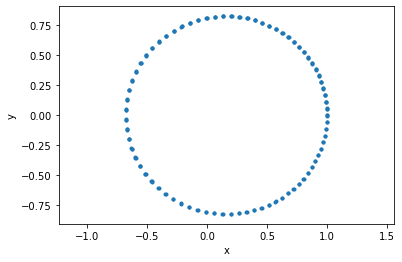

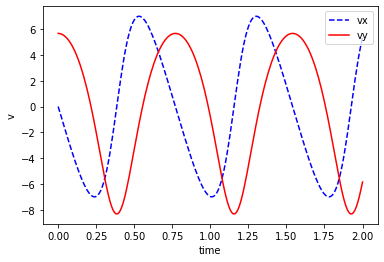

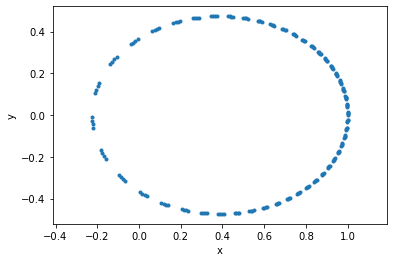

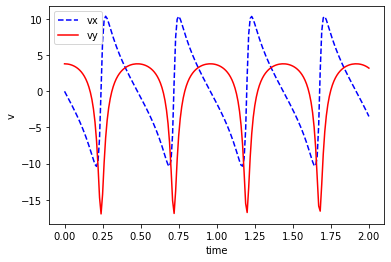

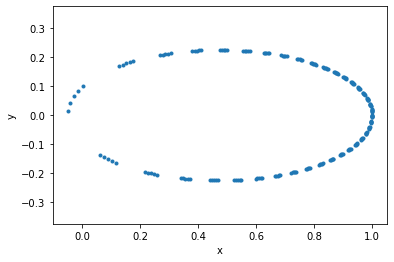

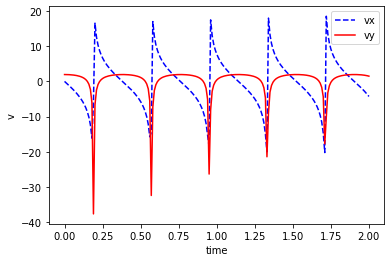

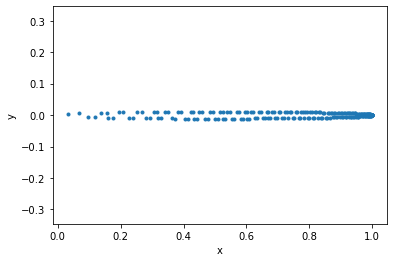

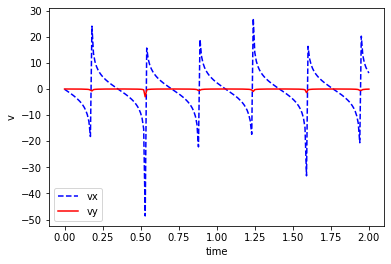

In [25]:
# repeat part (c) for each of the initial velocities by using a loop

for i in range(len(vinit)):
    # set up simulation
    sim = rb.Simulation()
    sim.units = ('yr','AU','Msun')
    sim.add(m=Mcent)
    sim.add(x=r,y=0,z=0,vx=0,vy=vinit[i],vz=0)
    
    # integrate
    for j, time in enumerate(times):
        sim.integrate(time)
        # the central mass is particle 0 and the test particle is particle 1
        x[j] = sim.particles[1].x
        y[j] = sim.particles[1].y
        vx[j] = sim.particles[1].vx
        vy[j] = sim.particles[1].vy
     
    # plot
    plt.plot(x,y,'.')
    plt.axis('equal')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()

    plt.plot(times, vx, 'b--', label='vx')
    plt.plot(times, vy, 'r-', label='vy')
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('v')
    plt.show()

#### the first orbital period is 0.75 of 1 yr, the second orbital period is half of a year, the third orbital period is a little less than half a year, and the fourth orbital period is the shortest which is closer to a quarter of a year 

## part (f)

In [26]:
# initial velocities between vcirc and vesc
vesc = np.sqrt(2.0*G*Mcent/r)
vinit = np.linspace(vcirc*1.1, vesc, 4)

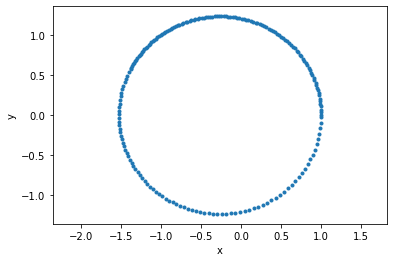

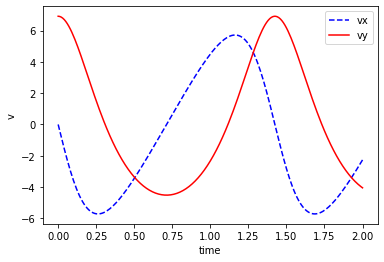

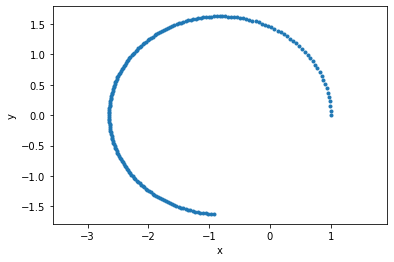

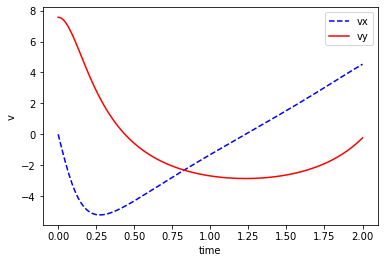

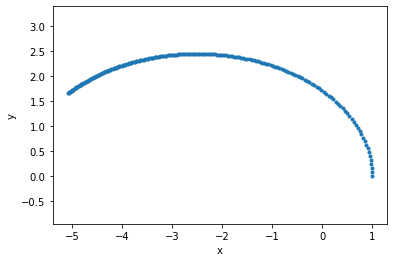

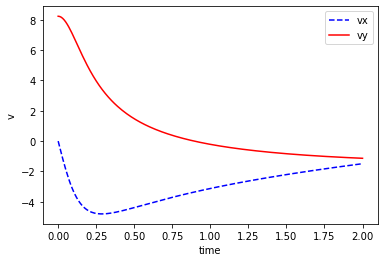

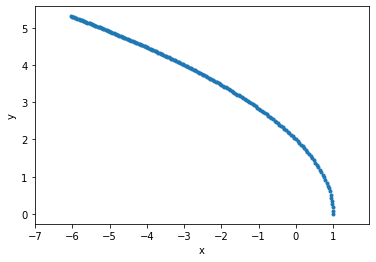

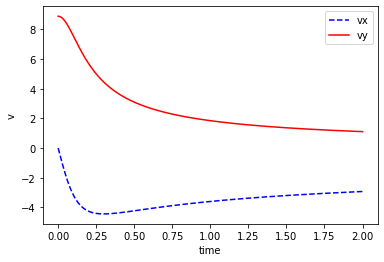

In [27]:
for i in range(len(vinit)):
    # set up simulation
    sim = rb.Simulation()
    sim.units = ('yr','AU','Msun')
    sim.add(m=Mcent)
    sim.add(x=r,y=0,z=0,vx=0,vy=vinit[i],vz=0)
    
    # integrate
    for j, time in enumerate(times):
        sim.integrate(time)
        # the central mass is particle 0 and the test particle is particle 1
        x[j] = sim.particles[1].x
        y[j] = sim.particles[1].y
        vx[j] = sim.particles[1].vx
        vy[j] = sim.particles[1].vy
     
    # plot
    plt.plot(x,y,'.')
    plt.axis('equal')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()

    plt.plot(times, vx, 'b--', label='vx')
    plt.plot(times, vy, 'r-', label='vy')
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('v')
    plt.show()

#### Now the final plot is unbounded because the test particle has escaped the grativational force of our point mass, M

### for the first three sets of plots, the orbital period is longer than previously and for the final there is no orbit